# Horror Movie Analysis

In [102]:
# Dependencies and Setup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File to Load (Remember to Change These)
horror_movies_to_load = "resources/IMDB Horror movies.csv"

# Read horror movie Data File and store into Pandas DataFrames
horror_movie_data = pd.read_csv(horror_movies_to_load)

# Combine the data into a single dataset.  
# movie_data_merge = pd.merge(horror_movie_data, <highest grossing>, how="left", on=["?", "?"])
horror_movie_data.head()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN
1,The Haunting of Mia Moss (2017),Horror,13-Jan-17,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000"
2,Sleepwalking (2017),Horror,21-Oct-17,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN
4,Infidus (2015),Crime| Drama| Horror,10-Apr-15,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN


In [49]:
by_country_df = horror_movie_data.loc[horror_movie_data['Release Country'] == 'Thailand'].copy()
by_country_df = by_country_df[~by_country_df['Budget'].isnull()]
by_country_df['Budget'] = by_country_df.Budget.str.replace(r'\D+', '').astype(float)

# df = by_country_df
# # print(df.dtypes)
# df = df.loc[df['Budget'] < 100000000]
df
# avg = df['Budget'].mean().astype(float)
# # avg = float(avg)
# avg
# by_country_df.dropna(how="any", inplace=True)
# by_country_df = by_country_df.Budget.str.replace(r'\D+', '')
# avg = by_country_df['Budget'].mean()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget
2296,Pee Mak (2013),Comedy| Horror| Romance,28-Mar-13,Thailand,NaN,7.4,115 min,Directed by Banjong Pisanthanakun. With Mario ...,Mario Maurer|Mai Davika Hoorne|Nattapong Chart...,Thai,NaN,65000000.0


In [3]:
# Country Analysis (Ben):
# What country spends the most on average per movie?

In [46]:
country_df = horror_movie_data
countries = country_df['Release Country'].unique()
len(countries)
budget_df = country_df[['Title','Release Country','Budget']].copy()
budget_df.dropna(how="any", inplace=True)
print(budget_df.head())
print(budget_df.dtypes)
budget_df['Budget'] = budget_df.Budget.str.replace(r'\D+', '')
#r"[a-zA-Z]",'' r'\D+', ''
budget_df['Budget'] = budget_df['Budget'].str.replace('$', '').astype(float)
print(budget_df.head())
print(budget_df.dtypes)

                              Title Release Country             Budget
1   The Haunting of Mia Moss (2017)             USA           $30,000 
5                In Extremis (2017)              UK        $3,400,000 
11       Rise of the Animals (2011)             USA            $7,000 
14                Sexy Durga (2017)             USA    INR 6,000,000  
15        Circus of the Dead (2014)             USA          $150,000 
Title              object
Release Country    object
Budget             object
dtype: object
                              Title Release Country     Budget
1   The Haunting of Mia Moss (2017)             USA    30000.0
5                In Extremis (2017)              UK  3400000.0
11       Rise of the Animals (2011)             USA     7000.0
14                Sexy Durga (2017)             USA  6000000.0
15        Circus of the Dead (2014)             USA   150000.0
Title               object
Release Country     object
Budget             float64
dtype: object


In [97]:
movie_cnt_df = budget_df[['Release Country','Budget']]
# df.groupby(["item", "color"])["id"].count().reset_index(name="count")
df = pd.DataFrame(movie_cnt_df.groupby(['Release Country']).count())
df = df.rename(columns={"Budget":"Count"})
df
merge_df = pd.merge(movie_cnt_df, df, on="Release Country")

merge_df = merge_df.sort_values('Count', ascending=False)
avg_merge = pd.DataFrame(merge_df.groupby(['Release Country','Count']).mean()['Budget'])
# avg_merge['Budget'] = avg_merge['Budget'].map("${:,.2f}".format)
df = pd.DataFrame(avg_merge)
df = df.reset_index().sort_values('Budget',ascending=False)
df = df.loc[df['Count'] >= 10]
df['Budget'] = df['Budget'].map("${:,.2f}".format)
df

,Release Country,Count,Budget
18,India,32,"$71,049,162.50"
39,Russia,18,"$16,993,718.06"
34,Philippines,14,"$8,795,928.57"
27,Mexico,10,"$5,028,200.00"
51,USA,834,"$4,257,310.12"
13,France,12,"$3,508,227.17"
23,Japan,11,"$3,385,727.27"
44,Spain,15,"$3,183,413.33"
1,Australia,14,"$3,142,000.00"
33,Peru,11,"$1,041,000.00"


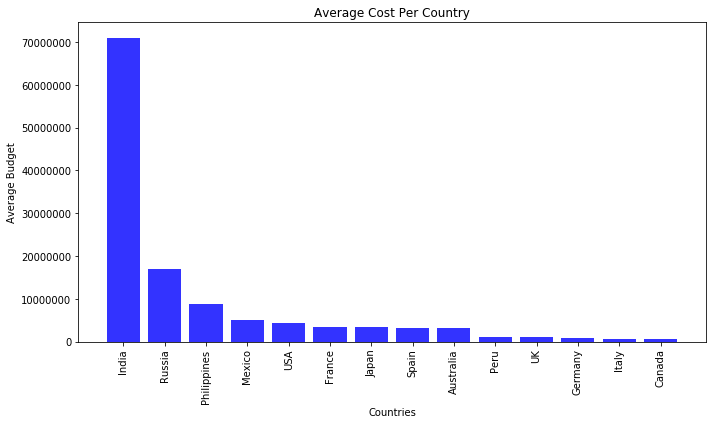

In [133]:
bud_df = df
countries = list(df['Release Country'])

# x_axis = np.arange(len(countries))
bud_df['Budget'] = bud_df.Budget.str.replace(r'\D+', '')
# bud_df['Budget'] = df['Budget'].map("${:,.2f}".format)
budg_amts = list(bud_df['Budget'])
budg_amts = [71049162,16993718,8795928,5028200,4257310,3508227,3385727,3183413,3142000,1041000,1022959,927872,560791,529631]
# test_list = [int(i) for i in budg_amts]
# test_list.sort(reverse=True)
# print(test_list)
# # budg_amts.sort(reverse=True)
x_axis = np.arange(len(budg_amts))
# type(x_axis)
plt.ticklabel_format(style='plain')
plt.bar(x_axis, budg_amts, color="b", alpha=0.8, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, countries,rotation="vertical")
plt.title("Average Cost Per Country")
plt.xlabel("Countries")
plt.ylabel("Average Budget")
plt.tight_layout()
plt.rcParams["figure.figsize"] = (20,6)
plt.show()

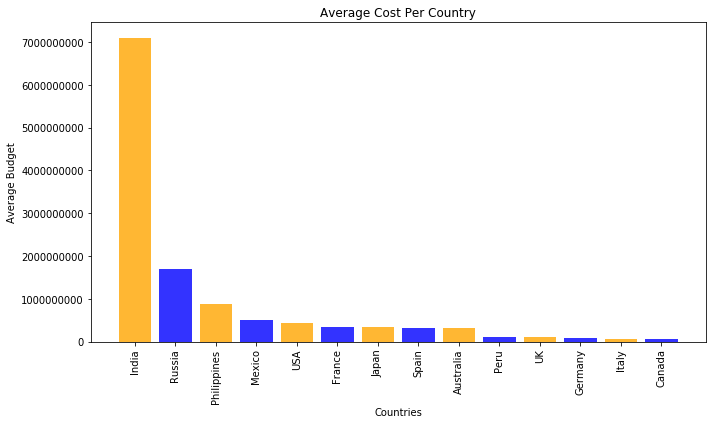

In [209]:
bud_df = df
countries = list(df['Release Country'])
bud_df['Budget'] = bud_df.Budget.str.replace(r'\D+', '')
test_list = list(bud_df['Budget'])
budg_amts = [int(i) for i in test_list]
budg_amts.sort(reverse=True)
x_axis = np.arange(len(budg_amts))
plt.ticklabel_format(style='plain')
colors=['orange','blue']
plt.bar(x_axis, budg_amts, color=colors, alpha=0.8, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, countries,rotation="vertical")
plt.title("Average Cost Per Country")
plt.xlabel("Countries")
plt.ylabel("Average Budget")
plt.tight_layout()
plt.rcParams["figure.figsize"] = (5,6)
plt.show()

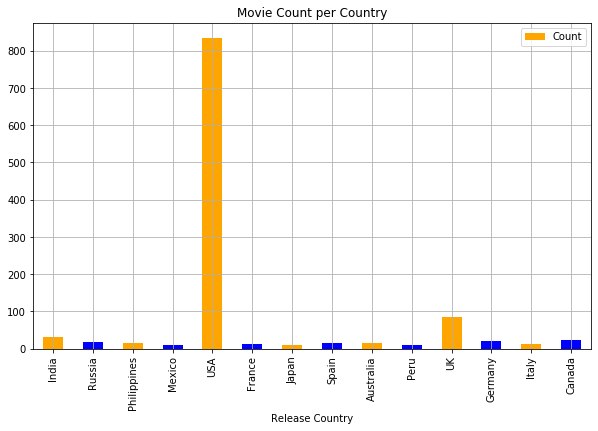

In [203]:
count_df = df
colors=['orange','blue']
ax = count_df.plot.bar(x='Release Country', y='Count', rot='vertical',figsize=(10,6),title='Movie Count per Country',grid=True,color=colors)

In [47]:
# What country spends the most on average per movie?
df = budget_df.loc[budget_df['Budget'] < 100000000]
avg_budget = pd.DataFrame(df.groupby(['Release Country']).mean()['Budget'])
# .map("${:,.2f}".format)
avg_budget = avg_budget.sort_values('Budget', ascending=False)
avg_budget['Budget'] = avg_budget['Budget'].map("${:,.2f}".format)
avg_budget

,Budget
Release Country,
Thailand,"$65,000,000.00"
Pakistan,"$20,000,000.00"
India,"$19,752,815.38"
China,"$18,900,000.00"
Belarus,"$18,000,000.00"
Philippines,"$8,795,928.57"
Russia,"$8,463,936.76"
Nigeria,"$7,500,000.00"
Austria,"$6,000,000.00"


In [7]:
# What is the relationship between rating average and country?
country_df = horror_movie_data
countries = country_df['Release Country'].unique()
len(countries)
rating_df = country_df[['Title','Release Country','Review Rating']].copy()
rating_df.dropna(how="any", inplace=True)
print(rating_df.head())
print(budget_df.dtypes)
# rating_df['Budget'] = budget_df.Budget.str.replace(r'\D+', '')
# #r"[a-zA-Z]",'' r'\D+', ''
# budget_df['Budget'] = budget_df['Budget'].str.replace('$', '').astype(float)
print(rating_df.head())
print(rating_df.dtypes)
print(len(rating_df))

                                 Title Release Country  Review Rating
0                           Gut (2012)             USA            3.9
3  Treasure Chest of Horrors II (2013)             USA            3.7
4                       Infidus (2015)             USA            5.8
6                    Ghostlight (2013)             USA            5.1
7              Parasyte: Part 2 (2015)           Japan            6.5
Title               object
Release Country     object
Budget             float64
dtype: object
                                 Title Release Country  Review Rating
0                           Gut (2012)             USA            3.9
3  Treasure Chest of Horrors II (2013)             USA            3.7
4                       Infidus (2015)             USA            5.8
6                    Ghostlight (2013)             USA            5.1
7              Parasyte: Part 2 (2015)           Japan            6.5
Title               object
Release Country     object
Review Rati

In [8]:
avg_rating = pd.DataFrame(rating_df.groupby(['Release Country']).mean()['Review Rating'])
avg_rating = avg_rating.sort_values('Review Rating', ascending=False)
avg_rating

,Review Rating
Release Country,
Maldives,7.800000
Sri Lanka,7.500000
Cambodia,7.400000
Pakistan,6.966667
Panama,6.700000
...,...
Serbia,4.566667
Colombia,4.300000
Germany,4.235593


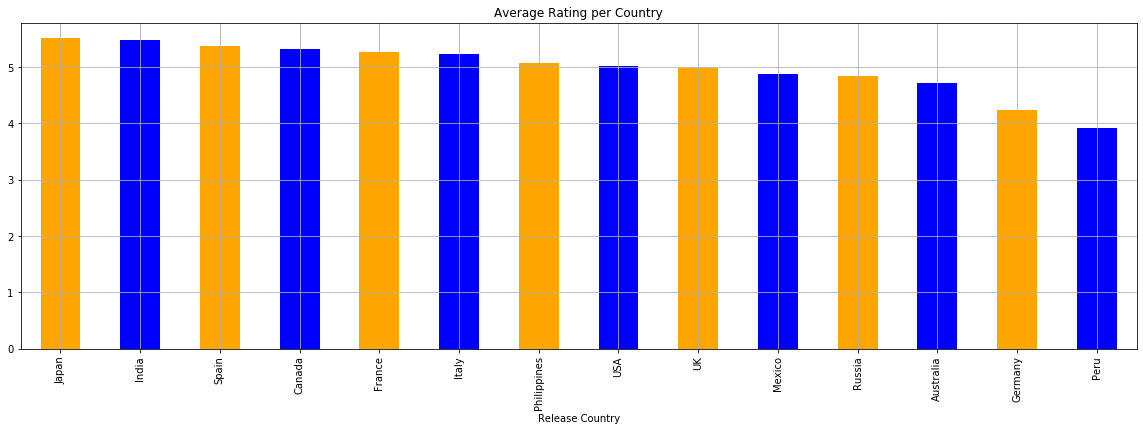

In [200]:
# df = df.loc[df['Count'] >= 10]
avg_rate_df = avg_rating
avg_rate_df = avg_rate_df.reset_index()
merge_df = pd.merge(avg_rate_df, df, on="Release Country")
colors=['orange','blue']
ax = merge_df.plot.bar(x='Release Country', y='Review Rating',rot='vertical',figsize=(20,6),title='Average Rating per Country',grid=True,color=colors,legend=False)
# ax.set_ylabel('Rating')